# DAY 6 - TASK 3

<b> Regression Algorithms on Advertising.csv to predict Sales </b>

#### Import Libraries

In [223]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

#### Load Dataset

In [224]:
df = pd.read_csv("Advertising.csv")

In [225]:
df.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [226]:
df.columns

Index(['Unnamed: 0', 'TV Ad Budget ($)', 'Radio Ad Budget ($)',
       'Newspaper Ad Budget ($)', 'Sales ($)'],
      dtype='object')

#### Changing names of columns to suitable names

In [227]:
df.rename(columns={'Unnamed: 0':'Index', 'TV Ad Budget ($)': 'TV_Budget', 'Radio Ad Budget ($)': 'Radio_Budget', 
                   'Newspaper Ad Budget ($)': 'Newspaper_Budget', 'Sales ($)': 'Sales' }, inplace = True)

In [228]:
df

,Index,TV_Budget,Radio_Budget,Newspaper_Budget,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


#### Dropping Index

In [229]:
df.drop(['Index'], axis=1, inplace = True)

#### Checking all info

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TV_Budget         200 non-null    float64
 1   Radio_Budget      200 non-null    float64
 2   Newspaper_Budget  200 non-null    float64
 3   Sales             200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


#### Finding and treating null values

In [231]:
df.isnull().sum(axis=0)

TV_Budget           0
Radio_Budget        0
Newspaper_Budget    0
Sales               0
dtype: int64

In [232]:
df.isna().sum(axis=0)

TV_Budget           0
Radio_Budget        0
Newspaper_Budget    0
Sales               0
dtype: int64

No null values exist in this dataset.

#### Finding Duplicates

In [233]:
duplicate = df[df.duplicated()]
duplicate

,TV_Budget,Radio_Budget,Newspaper_Budget,Sales


#### Finding Outliers

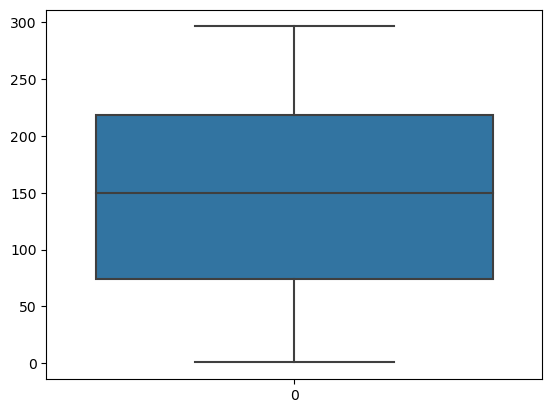

In [234]:
sns.boxplot(df.TV_Budget)
plt.show()

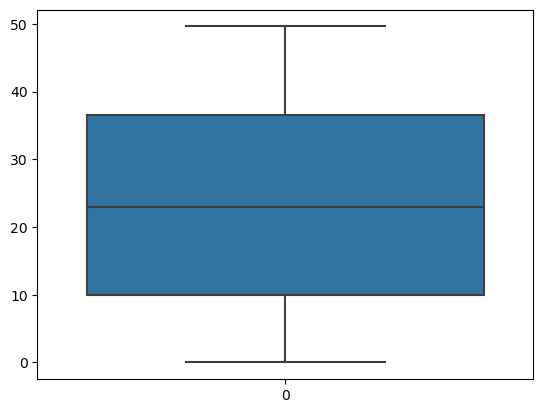

In [235]:
sns.boxplot(df.Radio_Budget)
plt.show()

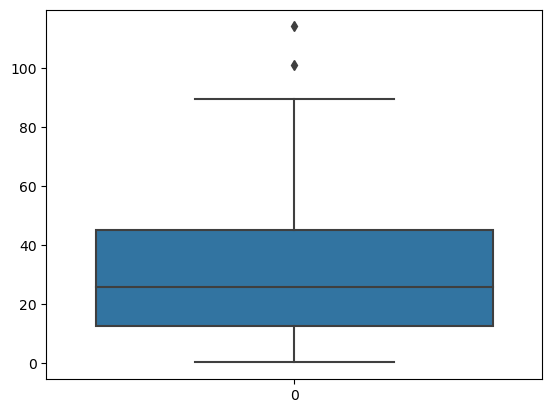

In [236]:
sns.boxplot(df.Newspaper_Budget)
plt.show()

In [237]:
len(df[df.Newspaper_Budget > 90])

2

In [238]:
df[df.Newspaper_Budget > 90]

,TV_Budget,Radio_Budget,Newspaper_Budget,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


No significant outlier found that needs to be dropped.

##### Bi Variate Analysis and Relationships

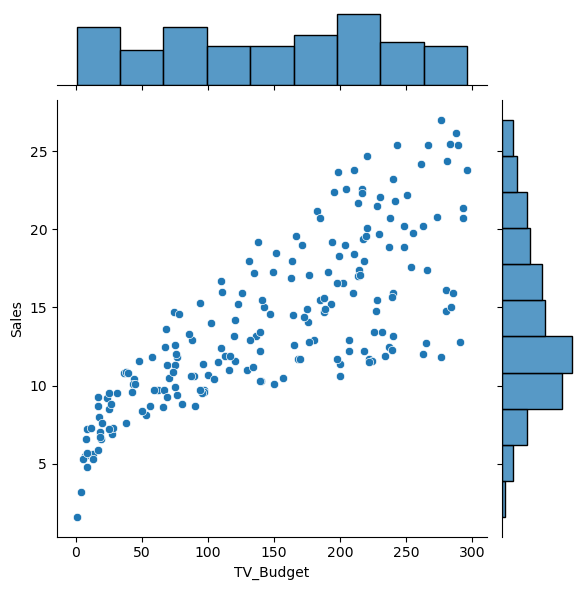

In [239]:
sns.jointplot(x=df.TV_Budget, y=df.Sales)

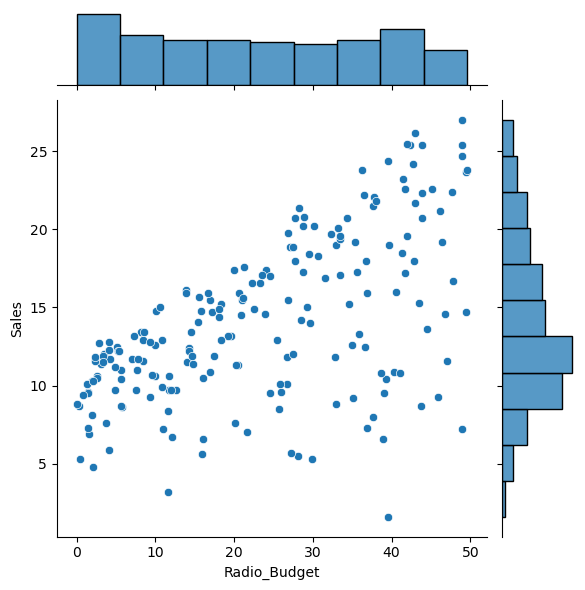

In [240]:
sns.jointplot(x=df.Radio_Budget, y=df.Sales)

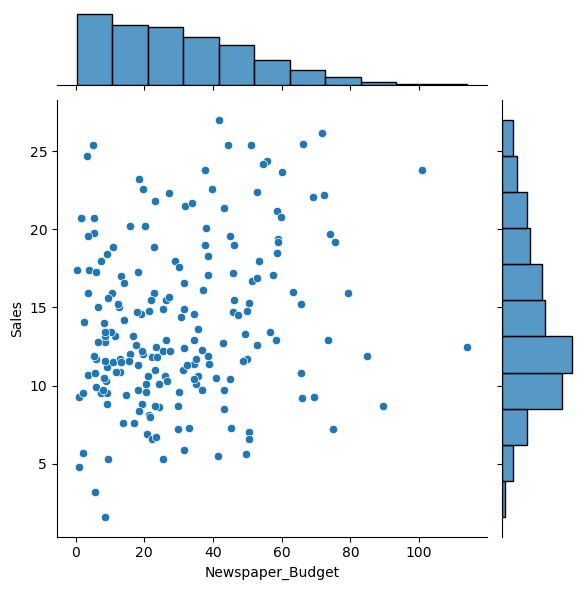

In [241]:
sns.jointplot(x=df.Newspaper_Budget, y=df.Sales)

TV_Budget is more related to Sales then other two columns of Radio_Budget and Newspaper_Budget. 

#### Preprocessing

In [242]:
df2 = df.copy()
df2

,TV_Budget,Radio_Budget,Newspaper_Budget,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


#### Train and Test Split

In [243]:
df_train, df_test = train_test_split(df2, train_size = 0.7, random_state = 100)

In [244]:
df_train.shape, df_test.shape

((140, 4), (60, 4))

In [245]:
y_train = df_train.pop("Sales")
X_train = df_train

In [246]:
X_train

,TV_Budget,Radio_Budget,Newspaper_Budget
74,213.4,24.6,13.1
3,151.5,41.3,58.5
185,205.0,45.1,19.6
26,142.9,29.3,12.6
90,134.3,4.9,9.3
...,...,...,...
87,110.7,40.6,63.2
103,187.9,17.2,17.9
67,139.3,14.5,10.2
24,62.3,12.6,18.3


In [247]:
y_train

74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
       ... 
87     16.0
103    14.7
67     13.4
24      9.7
8       4.8
Name: Sales, Length: 140, dtype: float64

In [248]:
y_test = df_test.pop("Sales")
X_test = df_test

In [249]:
X_test

,TV_Budget,Radio_Budget,Newspaper_Budget
126,7.8,38.9,50.6
104,238.2,34.3,5.3
99,135.2,41.7,45.9
92,217.7,33.5,59.0
111,241.7,38.0,23.2
167,206.8,5.2,19.4
116,139.2,14.3,25.6
96,197.6,3.5,5.9
52,216.4,41.7,39.6
69,216.8,43.9,27.2


In [250]:
y_test

126     6.6
104    20.7
99     17.2
92     19.4
111    21.8
167    12.2
116    12.2
96     11.7
52     22.6
69     22.3
164    11.9
124    19.7
182     8.7
154    15.6
125    10.6
196     9.7
194    17.3
177    11.7
163    18.0
31     11.9
11     17.4
73     11.0
15     22.4
41     17.1
97     15.5
128    24.7
133    19.6
82     11.3
139    20.7
123    15.2
83     13.6
65      9.3
151    11.6
162    14.9
170     8.4
77     14.2
32      9.6
173    11.7
174    11.5
85     15.2
168    17.1
112    14.1
171    14.5
181    12.2
7      13.2
46     10.6
75      8.7
28     18.9
29     10.5
195     7.6
40     16.6
153    19.0
115    12.6
64     18.0
59     18.4
1      10.4
192     5.9
136     9.5
152    16.6
161    13.3
Name: Sales, dtype: float64

### Linear Regression

In [251]:
linear_model = LinearRegression()

In [252]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [253]:
y_test_pred= linear_model.predict(X_test)

#### RMSE

In [254]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

1.3603977338130544


#### MAPE

In [257]:
def MAPE(y_test_pred,y_test):
    return np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    
print ('MAPE: ' + str(MAPE(y_test_pred,y_test)) )

MAPE: 9.434088571100315


#### R2 ERROR

In [258]:
print('R2 Value/Coefficient of Determination: {}'.format(linear_model.score(X_test, y_test)))

R2 Value/Coefficient of Determination: 0.9058622107532247


### Ridge Regression

In [259]:
import sklearn
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.001)
ridge_model = ridgeReg.fit(X_train,y_train)

In [260]:
import sklearn.metrics as metrics
y_test_pred= ridge_model.predict(X_test)

RMSE:

In [261]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

1.3603977325068672


MAPE:

In [262]:
def MAPE(y_test_pred,y_test):
    return np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    
print ('MAPE: ' + str(MAPE(y_test_pred,y_test)) )

MAPE: 9.434088506554303


R$2$ ERROR:

In [263]:
print('R2 Value/Coefficient of Determination: {}'.format(ridgeReg.score(X_test, y_test)))

R2 Value/Coefficient of Determination: 0.9058622109339977


## Lasso Regression

In [264]:
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.001)
lasso_model = lassoreg.fit(X_train,y_train)

In [265]:
import sklearn.metrics as metrics
y_test_pred= lasso_model.predict(X_test)

RMSE:

In [266]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

1.3603839269506097


MAPE:

In [267]:
def MAPE(y_test_pred,y_test):
    return np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    
print ('MAPE: ' + str(MAPE(y_test_pred,y_test)) )

MAPE: 9.433980772825931


R$2$ ERROR:

In [268]:
print('R2 Value/Coefficient of Determination: {}'.format(lassoreg.score(X_test, y_test)))

R2 Value/Coefficient of Determination: 0.9058641215780945


## ElasticNet Regression

In [269]:
from sklearn.linear_model import ElasticNet
Elastic = ElasticNet(alpha=0.001)
elasticnet_model = Elastic.fit(X_train,y_train)

In [270]:
import sklearn.metrics as metrics
y_test_pred= elasticnet_model.predict(X_test)

RMSE:

In [271]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

1.3603908531987146


MAPE:

In [272]:
def MAPE(y_test_pred,y_test):
    return np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    
print ('MAPE: ' + str(MAPE(y_test_pred,y_test)) )

MAPE: 9.434043527108038


R$2$ ERROR:

In [273]:
print('R2 Value/Coefficient of Determination: {}'.format(Elastic.score(X_test, y_test)))

R2 Value/Coefficient of Determination: 0.9058631630103013
